***

## Pandas第二课作业

####  作业提交说明：
- 位置：作业文件统一放置于/0.Teacher/Exercise/Pandas2/下
- 文件名：请先复制该notebook文件，并重新命名为(课程名)+(您姓名的全拼)，并按要求完成后保存
- 时间：课程结束后的第二天前提交。
- 注意：请勿抄袭，移动，修改，删除其他同学和原始空白的练习文件。


## 作业
- 作业所需数据文件位于0.Teacher/data目录下
***


#### 1.读入NVDA.csv中的数据


In [1]:
%config ZMQInteractiveShell.ast_node_interactivity = 'all'
%pprint
%matplotlib inline

Pretty printing has been turned OFF


In [2]:
import pandas as pd
data=pd.read_csv('../Data/NVDA.csv', index_col='Date', parse_dates=['Date'])
data.head()
data.info()

FileNotFoundError: [Errno 2] File b'../Data/NVDA.csv' does not exist: b'../Data/NVDA.csv'

In [ ]:
data.describe()

#### 2.请计算nvda股票Adj Close每天的log return    对数收益率

In [5]:
import numpy as np
data['log_return'] = np.log(data['Adj Close']/data['Adj Close'].shift(1))
data['log_return'].head(10)

Date
1999-01-22         NaN
1999-01-25    0.099630
1999-01-26   -0.080762
1999-01-27   -0.003121
1999-01-28   -0.003129
1999-01-29   -0.048164
1999-02-01    0.019545
1999-02-02   -0.080581
1999-02-03    0.020762
1999-02-04    0.053346
Name: log_return, dtype: float64

#### 3.请找出nvda股票涨幅最大的10天

In [6]:
data.head()
data['amount_of_increase'] = (data['Adj Close'] - data['Adj Close'].shift(1)) / data['Adj Close']
data_top10 = data['amount_of_increase'].sort_values(ascending = False).iloc[:10]
data.head()
data_top10

,Open,High,Low,Close,Adj Close,Volume,log_return
Date,,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200,NaN
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000,0.099630
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000,-0.080762
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200,-0.003121
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000,-0.003129


,Open,High,Low,Close,Adj Close,Volume,log_return,amount_of_increase
Date,,,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200,NaN,NaN
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000,0.099630,0.094828
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000,-0.080762,-0.084112
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200,-0.003121,-0.003125
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000,-0.003129,-0.003134


Date
2000-03-07    0.297824
2003-05-09    0.248479
2001-01-03    0.234824
2016-11-11    0.229624
2000-03-13    0.209380
2000-12-22    0.204991
2000-12-08    0.185930
2000-04-05    0.182004
2003-02-14    0.180233
1999-08-19    0.175115
Name: amount_of_increase, dtype: float64

#### 4. 将这十天的股票信息都输出来

In [7]:
data_top10_info = data.sort_values(by = 'amount_of_increase',ascending = False).iloc[:10]
data_top10_info

,Open,High,Low,Close,Adj Close,Volume,log_return,amount_of_increase
Date,,,,,,,,
2000-03-07,6.250000,7.270833,5.979167,6.942708,6.446771,48805200,0.353572,0.297824
2003-05-09,6.276667,7.176667,6.100000,7.123333,6.614493,230771400,0.285656,0.248479
2001-01-03,4.833333,6.572917,4.708333,6.520833,6.055031,22759200,0.267650,0.234824
2016-11-11,79.510002,88.769997,78.500000,87.970001,87.635475,54335100,0.260876,0.229624
2000-03-13,8.916667,12.500000,8.833333,12.437500,11.549053,60379200,0.234938,0.209380
2000-12-22,5.020833,6.375000,5.020833,5.843750,5.426314,23727000,0.229402,0.204991
2000-12-08,7.447917,8.333333,6.752600,8.291667,7.699371,21334800,0.205709,0.185930
2000-04-05,6.312500,8.125000,5.989583,7.640625,7.094833,15990000,0.200898,0.182004
2003-02-14,3.740000,4.016667,3.650000,4.013333,3.726649,88721100,0.198735,0.180233


#### 5把英伟达每个月最后一天的股价记录下来，做成一张新的月线图，然后把Adj Close画成一张图

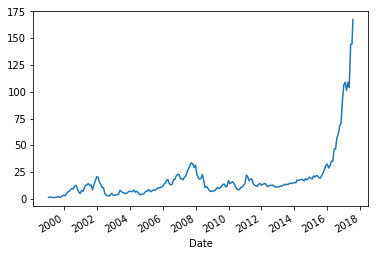

In [14]:
import matplotlib.pyplot as plt
data['year'] = data.index.year
data['month'] = data.index.month
data_year = data.groupby(['year','month'])
per_month_lastday = data_year.tail(1)
per_month_lastday["Adj Close"].plot()
    

#### 6.使用concat方法把英伟达的Adj Close与其他三只股票拼接在一起

In [5]:
Nvda = pd.read_csv(r'../Data/NVDA.csv', index_col='Date', parse_dates=['Date'])
Apple= pd.read_csv(r'../Data/APPLE.csv', index_col='Date', parse_dates=['Date'])
Goog = pd.read_csv(r'../Data/GOOG.csv', index_col='Date', parse_dates=['Date'])
Df4  = pd.read_csv(r'../Data/600028.SS.csv', index_col='Date', parse_dates=['Date'])
nvda = Nvda['Adj Close']
apple = Apple['Adj Close']
goog = Goog['Adj Close']
df4 = Df4['Adj Close']
frame = [nvda,apple,goog,df4]
total_4 = pd.concat(frame,axis = 1)
total_4.columns = ['nvda','apple','goog','df4']
# total_4
total_4.head()

,nvda,apple,goog,df4
Date,,,,
1980-12-12,NaN,0.423252,NaN,NaN
1980-12-15,NaN,0.401170,NaN,NaN
1980-12-16,NaN,0.371726,NaN,NaN
1980-12-17,NaN,0.380927,NaN,NaN
1980-12-18,NaN,0.391969,NaN,NaN


#### 7.从Google有数据的那一天起开始画出四只股票的Adj Close折线图


In [6]:
goog_nan = total_4['goog'].dropna().index[0]
goog_nan
ix = total_4.index.get_loc(goog_nan)  # 获取索引
ix

Timestamp('2004-08-19 00:00:00')

5978

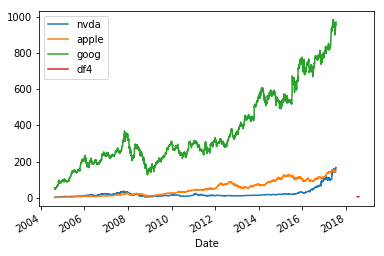

In [32]:
total_4[ix:].plot()